# Hito 2
**Nombres:** Gonzalo Sobarzo, Hernán Ulloa, Alexander Reisenegger, Ignacio Huenchumil.

**Fecha:** Noviembre 2022

**Grupo:** 11

**Curso:** CC5205

**Cuerpo docente:** Andres Abeliuk, Hernán Sarmiento,  Cinthia Sánchez, Jorge Ortiz

# Introducción
Como equipo buscamos una base de datos de música para así llevar a cabo un estudio de datos para poder predecir (y corroborar) distintos comportamientos de los consumidores de música, como por ejemplo, buscar potenciales hits sabiendo la trayectoria del artista o tal vez un posible remix al ver la popularidad de la canción original de modo que se estudiaran distintas influencia de los atributos de las canciones en su éxito.

Nuestra base de datos consta de distintos premios y certificaciones para canciones, albumes, artistas y a su vez cuanto tiempo se mantuvo popular, de modo que solo se muestran canciones que sean éxitos del momento tanto en spotify como en la lista de billboard, esto sera útil para poder predecir distintos atributos de una canción o artista y así enfocar nuestro proyecto al análisis de tendecias musicales.



# Exploración de datos
El dataset consiste de 8 tablas (fuente del dataset:https://www.kaggle.com/datasets/danield2255/data-on-songs-from-billboard-19992019), una que contiene datos de las canciones que aparecen en la lista billboard 100 cada semana desde 1999 hasta 2019, incluyendo datos como el título, los artistas, los géneros de la cancion, artistas invitados y cuántas semanas ha pasado en el top hasta la fecha, y tabién una tabla que contiene datos de cada artista que ha aparecido en esa lista en dicho período de tiempo. También incluye 2 listas de los premios Grammy en el mismo intervalo de tiempo, una sobre canciones y una sobre los álbumes. Además una tabla de singles y una de álbumes según su certificación RIAA, también en el mismo período (certifica cuántas copias vendieron, por ejemplo certificación diamante, platino, multi platino, oro, diamante varias veces, entre otros). Por último hay 2 tablas de las canciones más populares de spotify desde 2016 hasta 2019, también semanales. Una tiene los datos generales del top 200 semanal como la cantidad de reproducciones y el nombre entre otros, y la otra tiene atributos para cada canción como por ejemplo energía, si está en modo mayor o menor, bailabilidad, etc.

Hay múltiples dudas que se puede plantear al respecto, por ejemplo la canción Radioactive de Imagine Dragons pasó casi 2 años en el Billboard 100, y sería interesante analizar por qué una canción mantiene su popularidad, mientras otras sólo se quedan en la fama por un corto período.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
artistDf = pd.read_csv('data/artistDf.csv')
spotifyWeeklyTop = pd.read_csv('data/spotifyWeeklyTop200Streams.csv')
songAttributes = pd.read_csv('data/songAttributes_1999-2019.csv')
grammySongs = pd.read_csv('data/grammySongs_1999-2019.csv', sep = ';')
billboardHot100 = pd.read_csv('data/billboardHot100_1999-2019.csv')

In [23]:
songAttributes.drop(['Unnamed: 0'], axis =1)

,Acousticness,Album,Artists,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154926,0.333000,No.6 Collaborations Project,Ed Sheeran,0.747,200733,0.649,False,0.000000,0.1720,-6.218,0,Nothing On You (feat. Paulo Londra & Dave),80,0.2190,88.011,4,0.840
154927,0.314000,No.6 Collaborations Project,Ed Sheeran,0.469,204507,0.631,False,0.000000,0.1400,-6.569,0,I Don't Want Your Money (feat. H.E.R.),74,0.0853,91.418,4,0.763
154928,0.467000,No.6 Collaborations Project,Ed Sheeran,0.778,212307,0.590,False,0.000000,0.0902,-5.548,1,1000 Nights (feat. Meek Mill & A Boogie Wit da...,75,0.2700,97.995,4,0.515
154929,0.110000,No.6 Collaborations Project,Ed Sheeran,0.726,190293,0.731,False,0.000003,0.0928,-6.304,0,Way To Break My Heart (feat. Skrillex),73,0.1590,170.125,4,0.430


En la siguiente tabla se ve que Imagine Dragons Paso 87 semanas en el Chart:

In [3]:
songs = billboardHot100.drop_duplicates(subset = ['Artists', 'Name'])
songs.sort_values(by = ['Weeks.on.chart'], ascending = False).head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
25705,25706,Imagine Dragons,Radioactive,49,3.0,87.0,2014-05-09,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN
26334,26335,AWOLNATION,Sail,45,17.0,79.0,2014-03-21,"November 8, 2010","Electro-Pop,Pop-Rock,Alternative Rock,Industri...",Aaron bruno,Sail \nSail!\nThis is how I show my love\nI ma...,NaN
48082,48083,Jason Mraz,I'm Yours,48,6.0,76.0,2009-10-08,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",Jason mraz,I'm Yours \nWell you done done me and you bet ...,NaN
23559,23560,OneRepublic,Counting Stars,50,2.0,68.0,2014-10-17,"March 25, 2013","Folk Rock,Rock,Pop,Electro-Pop,Folk,Pop-Rock",Ryan tedder,"Counting Stars \nLately, I've been, I've been ...",NaN
35793,35794,Adele,Rolling In The Deep,49,1.0,65.0,2012-04-13,"November 29, 2010","Pop,Blues,Adult Alternative,Adult Contemporary...","Paul epworth, Adele",Rolling in the Deep \nThere's a fire starting ...,NaN


En esta tabla se puede ver una descripción de cada artista

In [4]:
print(artistDf.shape)#dimensión de la tabla de los distintos artistas.
artistDf.head()

(1035, 8)


,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


Tabla de datos con el top 5 de spotify la semana del 20 de julio de 2018

In [5]:
print(spotifyWeeklyTop.shape) #dimensión de la tabla de canciones semanales en spotify.
spotifyWeeklyTop.head()

(26395, 6)


,Unnamed: 0,Name,Artist,Features,Streams,Week
0,0,In My Feelings,Drake,NaN,30747676,2018-07-20
1,1,Lucid Dreams,Juice WRLD,NaN,12930705,2018-07-20
2,2,Nonstop,Drake,NaN,12312859,2018-07-20
3,3,God is a woman,Ariana Grande,NaN,10771324,2018-07-20
4,4,SAD!,XXXTENTACION,NaN,10503061,2018-07-20


Tabla de datos con el top 5 de Billboarhot100 la semana del 6 de julio de 2019

In [6]:
print(billboardHot100.shape)#dimensión de la tabla de las canciones en el billboard.
billboardHot100.head()

(97225, 12)


,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [26]:
dicc = {}
i = 0
for row, col in songs.iterrows():
    aux = col['Genre'].split(',')
    for k in aux:
        if k in aux:
            dicc[k] = dicc.get(k,0) + 1
        i+=1



In [27]:
gen = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Genre', 'Frequency'])

In [28]:
gen1_5 = gen.sort_values(by = ['Frequency'], ascending=False)
gen1_5.shape

(334, 2)

En total hay 334 generos, por lo que conviene filtrar los 20 mas populares para el gráfico

In [53]:
gen2 = gen1_5.head(20)
gen2

,Genre,Frequency
9,Pop,2994
8,Rap,2465
46,Rock,1538
30,R&;B,1335
0,Country,1255
4,Trap,563
24,Pop-Rock,428
41,Alternative Rock,364
33,Soundtrack,357
20,Canada,327


En este gráfico de tablas se pueden ver los géneros mas recurrentes en el billboard top 100:

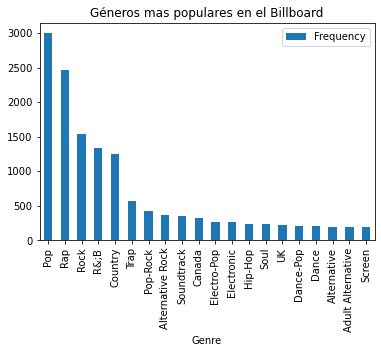

In [30]:
ax = gen2.plot.bar(x='Genre', y = 'Frequency', stacked=True, title = "Géneros mas populares en el Billboard")

En esta tabla se pueden ver los premios grammy del 2018:

In [12]:
print(grammySongs.shape)#dimensión de la tabla de canciones ganadora de los grammy's.
grammySongs.head()

(428, 7)


,Column1,X,GrammyAward,GrammyYear,Genre,Name,Artist
0,1,0,Record Of The Year,2018,General,this is America,Childish Gambino
1,2,1,Song Of The Year,2018,General,this is America,Childish Gambino
2,3,2,Best Pop Solo Performance,2018,Pop,Joanne (where Do you Think You're Goin'?),Lady Gaga
3,4,3,Best Pop Duo/Group Performance,2018,Pop,Shallow,Lady Gaga & Bradley Cooper
4,5,4,Best Dance Recording,2018,Dance/Electronic Music,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...


En esta tabla se muestran los artistas con mayor número de seguidores en spotify:

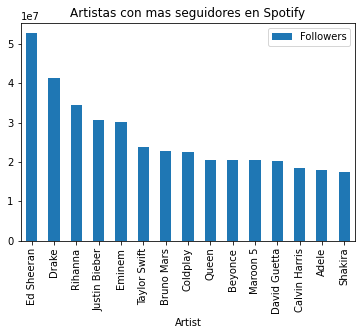

In [13]:
artist_p = artistDf.sort_values(by = ['Followers'], ascending=False)
artist_p = artist_p.head(17)
artist_p = artist_p.drop([769, 828]) #elimina play y cold, ya que eran versiones repetidas de coldplay
ax = artist_p.plot.bar(x= 'Artist', y = 'Followers', stacked= True, title = "Artistas con mas seguidores en Spotify")

La siguiente matriz de correlación muestra como se comparan las variables de los artistas en spotify:

<AxesSubplot:>

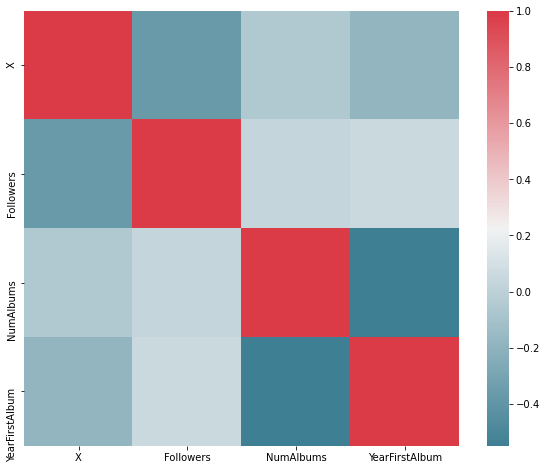

In [14]:
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
f, ax = pl.subplots(figsize=(10, 8))
corr = artistDf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

En el siguiente gráfico se observa que el artista que tiene más grammy's por canciones es Adele y la banda con más premios es U2:

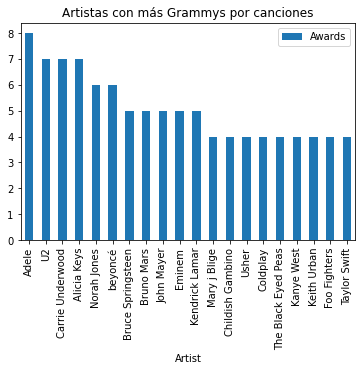

In [15]:
winners = grammySongs.loc[:, ['Artist']]
gen3 = winners.groupby(winners.columns.tolist(),as_index=False).size().rename(columns={'size':'Awards'})
gen4 = gen3.sort_values(by = ['Awards'], ascending=False).head(20)
grs = gen4.plot.bar(x= 'Artist', y = 'Awards', stacked= True, title = 'Artistas con más Grammys por canciones')


El siguiente diagrama de cajas representa la distribución de los atributos,  filtrados por las canciones que aparecen en la tabla de billboard 100:

(3193, 28)


<AxesSubplot:title={'center':'Distribucion de los atributos de las canciones más populares'}>

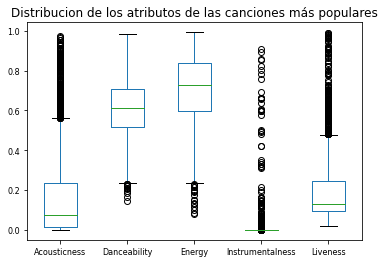

In [16]:

songAttributes = songAttributes.rename(columns = {"Artist" : "Artists"})
songAttributes.head()
sa = (
    songAttributes.merge(billboardHot100, 
              on=['Name', 'Artists'],
              how='left', 
              indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)
sa = sa.drop_duplicates(subset = ["Name", "Artists"])
print(sa.shape)
sa.iloc[:,[1, 4, 6, 8, 9]].plot.box(stacked=True, fontsize = 8, title = "Distribucion de los atributos de las canciones más populares")



Tabla de los atributos de canciones que estuvieron alguna vez en el Billboard:

In [17]:
sa.head()

,Unnamed: 0_x,Acousticness,Album,Artists,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,...,Unnamed: 0_y,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
59,59,0.000877,Dosage,Collective Soul,0.547,173267,0.902,False,0.000563,0.0839,...,97222.0,96.0,73.0,20.0,1999-07-12,NaN,"Hockey,Gaming,Soundtrack,Rock",Collective soul,Heavy \nComplicate this world you wrapped for ...,NaN
185,33,0.587000,Live At Open Air Gampel (2004),Everlast,0.316,396896,0.634,False,0.000019,0.9070,...,96997.0,47.0,13.0,33.0,1999-07-26,NaN,"Rap,Rock",Everlast,What It's Like \nWe've all seen the man at the...,NaN
328,20,0.028100,Something In The Air,Lila McCann,0.644,212360,0.785,False,0.000001,0.0996,...,96948.0,92.0,41.0,19.0,1999-08-02,NaN,Pop,NaN,With You \nLast night I couldn't sleep\nI foun...,NaN
356,0,0.055200,Jordan Knight,Jordan Knight,0.830,289760,0.655,False,0.000001,0.0567,...,96858.0,91.0,10.0,20.0,1999-08-09,NaN,Pop,"Jimmy jam, Robin thicke, Terry lewis, Jordan k...",Give It to You \nYou say it's been too long\nS...,NaN
842,34,0.046400,Terry Dexter (U.S. Version),Terry Dexter,0.546,242347,0.618,False,0.000000,0.0298,...,96775.0,99.0,NaN,NaN,1999-08-16,NaN,Pop,NaN,"Better Than Me \nBoy, I got my eyes on you\nGu...",NaN


A su vez una tabla con los valores independientes

In [18]:
print(songAttributes.shape)#dimensión de la tabla song attributes.
songAttributes.head()

(154931, 18)


,Unnamed: 0,Acousticness,Album,Artists,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


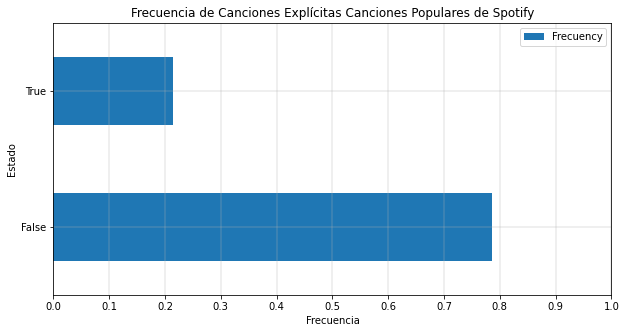

In [19]:
explicit = songAttributes.Explicit.value_counts(normalize=True)
df2 = pd.DataFrame([
                    ["False",explicit[0]],
                    ["True",explicit[1]]
                    ],
                    columns=["State","Frecuency"])


ax  = df2.plot.barh(x = "State", y = "Frecuency", xticks = [k/10 for k in list(range(11))], figsize = (10,5))
ax.set(xlabel = "Frecuencia", ylabel = "Estado", title = "Frecuencia de Canciones Explícitas Canciones Populares de Spotify")
ax.grid(linestyle='-', linewidth=0.4)
plt.show()

# Preguntas y problemas

Preguntas y problemas
 Despues de haber analizando y planteado las tablas con sus respectivos datos sabemos que todas las tablas poseen una medida de popularidad, alcance o ventas, que miden la influencia de la canción artista y/o album, al mismo tiempo se puede ver que estos rankings son distintos ya que spotify tiene una base de datos distinta a las demas tablas (Billboard's, Grammy's) Por lo cual podemos manejarnos entre las tablas midiendo la popularidad con las siguientes preguntas:
 
- ¿Que hace que ciertos géneros musicales se mantengan mas tiempo con popularidad?

Hay Géneros que se mantienen atemporales y siempre figuran en los charts en el transcurso de los 20 años que se registran como es el caso del POP que es el que aparece más veces en la base de datos.

- ¿Qué genero musical llegará al top 1 del Billboard la semana del 13 de Julio del 2019?

El objetivo es estudiar basado en los top anteriores ver si hay algún patrón que permita predecir el género musical de la próxima canción en llegar al primer puesto.

- ¿Qué conjunto de atributos extraídos de las canciones, representa de mejor manera las diferencias entre géneros? 

El objetivo de esta pregunta es ver como las canciones pertenecientes a ciertos géneros se diferencian de otras de otros géneros musicales.

# Metodologías Preguntas

>Pregunta 1: Planteamos la pregunta de modo que se puedan agrupar distintas características de los géneros mediante clustering para poder asi encontrar patrones que poseen los géneros con mayor cantidad de apariciones en el chart del billboard y los patrones que poseen los géneros que no perduran en este último, para asi comparar estos atributos y determinar si existen ciertos patrones convincentes para determinar canciones que perduren en el billboard y/o tengan un mayor número de apariciones
de modo que se agruparan las tablas de los billboardhot100, songatributes, grammyawards y ArtistDF para tener distintas agrupaciones posibles para analizar der forma más efectiva los datasets.


In [20]:
J_table = billboardHot100.drop_duplicates(subset = ['Name'])
JT = (
    songAttributes.merge(J_table, 
              on=['Name', 'Artists'],
              how='left', 
              indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)
a=JT.drop(columns=("Album"))
b=a.drop(columns=("Unnamed: 0_x"))
c=b.drop(columns=('Unnamed: 0_y'))
d=c.drop(columns=('Lyrics'))
e=d.drop(columns=('Writing.Credits'))
f=e.drop(columns=('Features'))



#JT_2 = (
#    artistDf.merge(f, 
 #             on=['Followers', 'Artist'],
  #            how='left', 
   #           indicator=True)
    #.query('_merge == "both"')
    #.drop(columns='_merge')
#)
#g=f.drop(columns=('Features'))
#h=g.drop(columns=('Features'))
#i=h.drop(columns=('Features'))
f.sort_values(by = ['Weeks.on.chart'], ascending = False).columns

Index(['Acousticness', 'Artists', 'Danceability', 'Duration', 'Energy',
       'Explicit', 'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Name',
       'Popularity', 'Speechiness', 'Tempo', 'TimeSignature', 'Valence',
       'Weekly.rank', 'Peak.position', 'Weeks.on.chart', 'Week', 'Date',
       'Genre'],
      dtype='object')

>Pregunta 2: El objetivo de la pregunta es entrenar un clasificador que permita encontrar patrones y predecir el comportamiento del billboard para así encontrar la canción top 1 de una semana, y de ésta manera predecir la semana siguiente a la última del dataset. Se puede probar con distintos algoritmos de clasificación y usar gridSearchCV para encontrar el mejor algoritmo y los mejores parámetros que permitan predecirla. También se puede utilizar cross validation para entrenar el clasificador con distintos subconjuntos y así iterar para obtener mejores resultados. Para no utilizar tantos géneros distintos y extraños, se considerarán los 20 géneros más populares en el Billboard.

In [23]:
billboardHot100.head(5)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [64]:
study_table = billboardHot100
genres = study_table.Genre.str.split(',', expand = True)
genres_list = gen2['Genre'].head(6).to_numpy()
genres2 = genres.dropna(axis = 1)
genres2 #funca supongo

,0
0,Country
1,Pop
2,Hip-Hop
3,Synth-Pop
4,Canada
...,...
97220,Jamaica
97221,Hockey
97222,Country
97223,Rap


In [22]:
#7-06-2019 top100genero, top100nombre, top100artista..., top99genero...  top1genero (no anhadir nada mas del top1)
billboardColumns = ['Artists', 'Name', 'Weeks.on.chart', 'Date' ,'Genre', 'Writing.Credits', 'Features']
columnas = ['semana', 'top1prediccion']
for i in range(1, 101):
    for name in billboardColumns:
        string ='top' + str(i) + name
        columnas.append(string)
weeks = pd.DataFrame(billboardHot100['Week'])
weeks = weeks.drop_duplicates( subset = ["Week"], ignore_index = True)
weeks = weeks['Week']

tablaPrediccion = pd.DataFrame(columns = columnas)
for i in range(len(weeks)-1):
    currentWeek = weeks[i]
    oldWeek = weeks[i+1]
tablaPrediccion
 



,semana,top1prediccion,top1Artists,top1Name,top1Weeks.on.chart,top1Date,top1Genre,top1Writing.Credits,top1Features,top2Artists,...,top99Genre,top99Writing.Credits,top99Features,top100Artists,top100Name,top100Weeks.on.chart,top100Date,top100Genre,top100Writing.Credits,top100Features


>Pregunta 3: Como la tabla de 'songAttributes' no tiene el atributo de género musical de la canción, se utiliza la tabla de 'artistDf' que contienen informarción de los artistas incluyendo su género musical. la idea es generar cluster's que en teoría deberían agruparse según géneros musicales por lo primero se evaluará la pureza de estos, por lo que se usáran distintas formas de hacer cluster's, es decir, se usarán métodos como k-means, los dendogramas, etc. Si no se obtienen cluster's puros se procederá con subconjuntos de atributos para así encontrar donde más se diferencian los géneros musicales. Para facilitar el estudio de esto se tomarán los géneros musicales más populares anteriormente encontrados, asignando uno por canción, si la canción no tiene un género popular se le asignará uno que tenga cierto sentido o se dejará como outlier de los datos.

* Especificamente primero se preprocesaran ambas tablas 'songAttributes' y 'artistDf' para eliminar datos corruptos o no relevantes.
* Pasar el explicit a binario (Get_Dummies) ver primer lab de clustering.
* Pasar el genero a binario.
* No es relevante para el problema planteado.
* Se utilizaran las columnas de escalas numericas de la tabla sonAttributes
* Para validar los clustering se tienen los generos para las canciones utilizadas por lo que se puede comprobar si los cluster agrupan correctamente.
* Se utilizaran 

* Aplicar técnicas de clustering (K-means, DBSCAN), evaluar y discutir los resultados.



